In [18]:
name = "Topi Ahola"
id = 2411719

In [19]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_09_Signals.csv


In [4]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [5]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [6]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [7]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

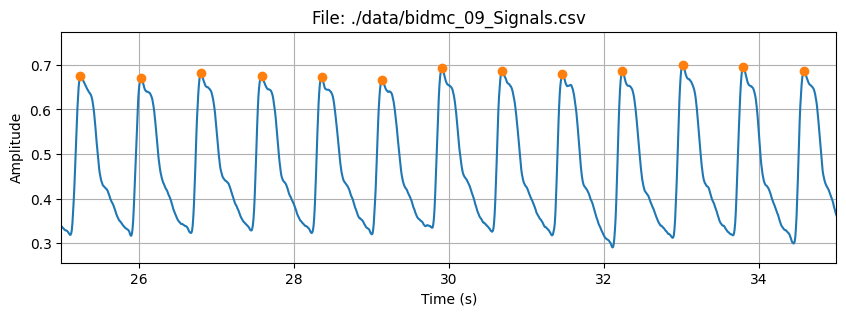

In [36]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 120)

peaks, properties = find_peaks(ppg, height=0.5, distance = 20)
ppi = np.diff(peaks)*ts*1000 #peak_to_peak_interval in milliseconds mitä tämä tekee??

plt.plot(t[peaks], ppg[peaks], 'o')
plt.grid()
plt.show()

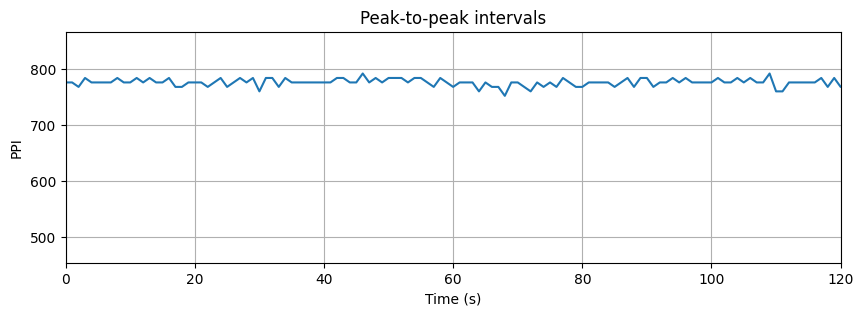

In [38]:
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Time (s)') #ei ole aika!!!!
plt.ylabel('PPI')
plt.title(f'Peak-to-peak intervals')
plt.xlim(0, 120)
plt.grid()
plt.show()

121.8


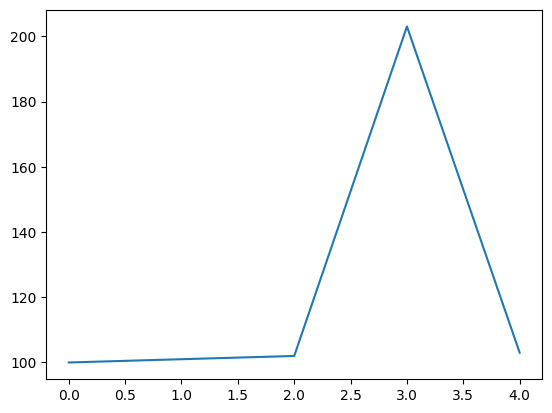

In [29]:
x = np.array([100, 101, 102, 203, 103])
#x = [100, 101, 102, 203, 103]
mean_x = np.mean(x)
print(mean_x)
plt.plot(x)


In [10]:
# Remember to add your interpretations ...